# Investigate MLP

### Add the src folder to the path

In [4]:
import sys
import os

root_path = os.path.dirname(os.getcwd())
src_path = os.path.join(root_path, "src")
sys.path.insert(0, src_path)

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%matplotlib inline
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl
import tissue_purifier as tp
from tissue_purifier.data_utils.helpers import define_train_loader, define_test_loader
from tissue_purifier.model_utils.simclr import SimCLR
from pytorch_lightning.loggers import NeptuneLogger
from tissue_purifier.data_utils import SpatialAutocorrelation
from tissue_purifier.plot_utils import plot_all_maps

In [8]:
embeddings_file = "output_prediction_random-383.pt"
embeddings = torch.load(embeddings_file, map_location=torch.device('cpu'))

In [12]:
print(embeddings.keys())

dict_keys(['metadata', 'features_bbone_ref_trsfm', 'features_head_ref_trsfm', 'features_bbone_train_trsfm', 'features_head_train_trsfm'])


In [21]:
import numpy
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

x_all = embeddings["features_bbone_ref_trsfm"].cpu().numpy()
morans_all = numpy.array([metadata.moran for metadata in embeddings["metadata"]])
fnames_all = numpy.array([metadata.f_name for metadata in embeddings["metadata"]])

x_train, x_test, y_train, y_test = train_test_split(
    x_all,
    morans_all,
    stratify=fnames_all,
    test_size=0.2,
    random_state=1)

In [71]:
mlp1 = MLPRegressor(
    hidden_layer_sizes=[],
    solver='sgd',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=100000,
    shuffle=True,
    random_state=0,
    tol=1E-6,
    verbose=False,
    n_iter_no_change=100,
    early_stopping=False)
mlp1.fit(x_train, y_train)

mlp2 = MLPRegressor(
    hidden_layer_sizes=[],
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=100000,
    shuffle=True,
    random_state=0,
    tol=1E-6,
    verbose=False,
    n_iter_no_change=100,
    early_stopping=False)
mlp2.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=[], max_iter=100000, n_iter_no_change=100,
             random_state=0, tol=1e-06)

0.0007575219936837815 1257 0.7070648628288125 0.6964783543274111
0.0007569154696474772 839 0.71147642877831 0.7056117357131386


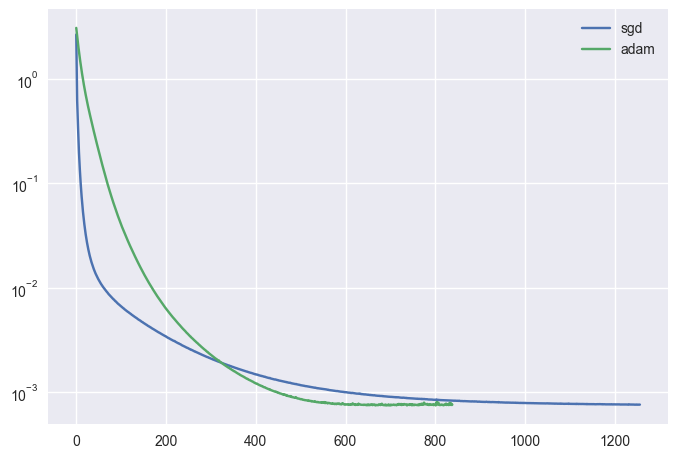

In [72]:
print(mlp1.loss_, mlp1.n_iter_, mlp1.score(x_train, y_train), mlp1.score(x_test, y_test))
print(mlp2.loss_, mlp2.n_iter_, mlp2.score(x_train, y_train), mlp2.score(x_test, y_test))

plt.semilogy(mlp1.loss_curve_, label='sgd')
plt.semilogy(mlp2.loss_curve_, label='adam')
plt.legend()

In [15]:
x_all.shape

torch.Size([1800, 32])

In [ ]:
#torch.load("../trained_model/classifier_data_0_1_3_4.pt")

In [ ]:
#all_df = [df_wt1, df_wt2, df_wt3, df_dis1, df_dis2, df_dis3]
#all_labels_sparse_images = [0, 0, 0, 1, 1, 1]
#all_names_sparse_images = ["wt1", "wt2", "wt3", "dis1", "dis2", "dis3"]
#all_sparse_images = [tp.data_utils.SparseImage.from_panda(
#      df, "x", "y", category="cell_type", pixel_size=config["simulation"]["PIXEL_SIZE"], padding=10) 
#                   for df in all_df]

#config["simulation"]["N_CROPS_TEST_FOR_TISSUE"] = 24
#
#index = [0,1,3,4]
#suffix = "_".join([str(tmp) for tmp in index])
#name = "classifier_data_"+suffix+".pt"
#saved_file = os.path.join(model_folder, name)
#print("working on ->", saved_file)
#
#dataloader = define_testloader([all_sparse_images[i] for i in index],
#                               [all_labels_sparse_images[i] for i in index],
#                               [all_names_sparse_images[i] for i in index],
#                               config,
#                               use_test_transform=True)
#
#output  = encoder.embed_by_backbone(dataloader, 
#                                    sparse_tensor_callback = SpatialAutocorrelation(modality='moran',
#                                                                                    n_neighbours=6,
#                                                                                    radius=None,
#                                                                                    neigh_correct=False))
#
#torch.save(output, saved_file)
#print("saved the file ->", saved_file)